# [Kaggle: Dogs vs. Cats Classification](https://www.kaggle.com/c/dogs-vs-cats)
In this problem, we will create a image classifier to differentiate between images of Dogs and Cats.
Let's start by importing the necessary libraries. we'll be using `numpy`, `matplotlib` and tensorflow's `keras` API for this problem.

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img
from tensorflow.keras.applications.resnet50 import ResNet50, preprocess_input
%matplotlib inline

Now, we need to prepare our dataset. I'll be using the dataset in the fastai repository at http://files.fast.ai which already has the files arranged in proper folders. You can easily download the dataset by uncommenting the following cell and running it. The dataset is almost 820 MB in size and has 23000 images in training set and 2000 images in validation set.

In [ ]:
# !wget http://files.fast.ai/data/dogscats.zip; unzip dogscats.zip; rm dogscats.zip wget-log

## Prepare the DataSet
Now, we'll create dataset paths for our problem. The train directory consists of images from the training set and the valid directory consists of the validation set.

In [5]:
path = 'dogscats/'
train = f'{path}train'
valid = f'{path}/valid'

In [ ]:
!ls dogscats/

Let's check one of the images in each category:

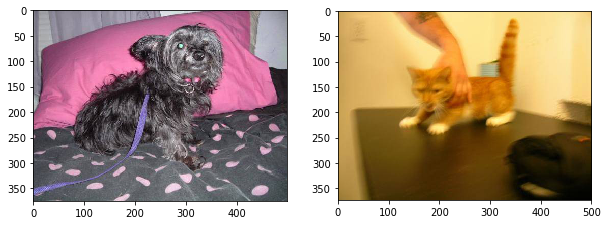

In [57]:
cat = load_img('dogscats/train/cats/cat.0.jpg')
dog = load_img('dogscats/train/dogs/dog.0.jpg')
plt.figure(figsize=(10, 10))
plt.subplot(1, 2, 1)
plt.imshow(dog)
plt.subplot(1, 2, 2)
plt.imshow(cat)

Now, we define the batch size for our training model. In every iteration, our model will process a number of images according to the batch size.In this problem, `batch_size = 64` means that 64 images will be processed at a time by our model. If you get any `Out of memory` error then try reducing the batch size. Then, we define the image size which is the image dimension. Here, we have used `size = 150` so the image dimension will be 150\*150 pixels. Whatever is the dimension of the original image, we'll convert them to 150\*150.

In [ ]:
batch_size = 64
size = 150

Now, let's create the generators for the training and the valdation set. We'll use the `ImageDataGenerator` from the `keras` API. The `ImageDataGenerator` API provides features for image augmentation like shearing, zooming and flipping. It also normalizes the data by rescaling.

In [8]:
train_data_generator = ImageDataGenerator(rescale=1./255, shear_range=0.2, zoom_range=0.2, horizontal_flip=True)
valid_data_generator = ImageDataGenerator(rescale=1./255)

train_generator = train_data_generator.flow_from_directory(train, target_size=(size, size), batch_size=batch_size, class_mode='binary')
valid_generator = valid_data_generator.flow_from_directory(valid, target_size=(size, size), batch_size=batch_size, class_mode='binary')

Found 23000 images belonging to 2 classes.
Found 2000 images belonging to 2 classes.


In above generator, we have used `class_mode='binary'` as we have 2 classes for classification i.e. either Dog or Cat.

## Creating the model
For this problem, we will be using `keras`'s simple interface for model creation. Model creation in `keras` includes 3 steps as follws:
* Defining the layers in Model
* Compiling the Model.
* Fitting the data.

### Defining the layers.
We'll be using `keras.Sequential` which creates nothing but a stack of layers for our model. We'll be creating a simple Convolutional Neural Network with a few filters and Dropouts.The first hidden layer is a convolutional layer that takes our images in 150\*150\*3 dimension (3 colour channels) and outputs 32 activations. The second layer is a activation layer which use ReLU (Rectified Linear Unit) activation function on the output of first layer. Then, we apply MaxPooling to the outputs which selects the maximum of a set of numbers from the outputs. Here, the pool_size is 2 so the maximum will be chosen from a 2\*2 matrix of numbers. The 3 layers are repeated two more times then the final output is flattened i.e. the output matrix is unrolled into a single dimensional vector. Then it is passed through a fully connected layer and a ReLU activation layer. Then we apply the 0.5 Dropout to the output which drops about 50% of the values from the output vector. Then, it is passed to another fully connected layer with a single output and finally to a sigmoid activation layer which gives our prediction.

In [ ]:
model = keras.Sequential([
    keras.layers.Conv2D(32, input_shape=(150, 150, 3), kernel_size=(3, 3)),
    keras.layers.Activation('relu'),
    keras.layers.MaxPooling2D(pool_size=(2, 2)),
    
    keras.layers.Conv2D(32, kernel_size=(3, 3)),
    keras.layers.Activation('relu'),
    keras.layers.MaxPooling2D(pool_size=(2, 2)),
    
    keras.layers.Conv2D(64, kernel_size=(3, 3)),
    keras.layers.Activation('relu'),
    keras.layers.MaxPooling2D(pool_size=(2, 2)),
    
    keras.layers.Flatten(),
    keras.layers.Dense(64),
    keras.layers.Activation('relu'),
    
    keras.layers.Dropout(0.5),
    keras.layers.Dense(1),
    keras.layers.Activation('sigmoid')
])

Note: It is better to use sigmoid activation function for last layer in binary classification problems instead of tanh or others. It's because the output of sigmoid is between 0 and 1 which is easier to use than tanh which has output in range -1 to 1.

### Compiling the model.
Now, we need to compile our model. To compile a model, we need to define two things. First, the optimizer to optimize the model and the loss function to use. In this case, we'll be using `RMSprop` as our optimizer and `binary_crossentropy` for our loss function as there are binary classes. For multiple classes, we can use `sparse_categorical_crossentropy`. We have also set the metrics to display the accuracy of our model in every epoch.

In [ ]:
model.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

### Fitting the Data.
Finally, we will fit the data to our model using the generators we created previously. we have randomly chosen `epochs=5` for this case. Let's see how well our model fits the data.

In [11]:
model.fit_generator(
    train_generator,
    steps_per_epoch=train_generator.n // batch_size,
    epochs=5,
    validation_data=valid_generator,
    validation_steps=valid_generator.n // batch_size
)

Epoch 1/5
359/359 [==============================] - 206s 573ms/step - loss: 0.6566 - acc: 0.6229 - val_loss: 0.5534 - val_acc: 0.7203
Epoch 2/5
359/359 [==============================] - 202s 564ms/step - loss: 0.5406 - acc: 0.7332 - val_loss: 0.4538 - val_acc: 0.7838
Epoch 3/5
359/359 [==============================] - 202s 561ms/step - loss: 0.4848 - acc: 0.7691 - val_loss: 0.4651 - val_acc: 0.7828
Epoch 4/5
359/359 [==============================] - 201s 561ms/step - loss: 0.4579 - acc: 0.7897 - val_loss: 0.4112 - val_acc: 0.8221
Epoch 5/5
359/359 [==============================] - 202s 563ms/step - loss: 0.4339 - acc: 0.8065 - val_loss: 0.3748 - val_acc: 0.8266


We seem to have obtained approximately **83%** of accuracy on our validation set in only 5 epochs with much less code due to `keras`'s simple interface. That's great. With some hyperparameter tuning we should be able to increase our accuracy.
An alternative to this is using a pre-trained model for our problem which we'll see below.

## Using Pre-trained Model: ResNet50
It can be easier and sometimes wiser to use a pre-trained model for some problems instead of implementing it from scratch because the pre-trained model has already trained weights and activations which could take days or even weeks if we tried to train the same from scratch. ResNet is a pretrained model used for ImageNet with thousands of classes. We'll be modifying it for our case i.e. to output a binary class. Firstly, the ResNet is trained on images with size of 224\*224 pixels so we'll use that as the image size and batch size will be same.

In [ ]:
size = 224
batch_size = 64

As above, we'll be creating the generators for our training and validation sets.

In [14]:
train_data_generator = ImageDataGenerator(preprocessing_function=preprocess_input, shear_range=0.2, zoom_range=0.2, horizontal_flip=True)
valid_data_generator = ImageDataGenerator(preprocessing_function=preprocess_input)

train_generator = train_data_generator.flow_from_directory(train, target_size=(size, size), batch_size=batch_size, class_mode='binary')
valid_generator = valid_data_generator.flow_from_directory(valid, shuffle=False, target_size=(size, size), batch_size=batch_size, class_mode='binary')

Found 23000 images belonging to 2 classes.
Found 2000 images belonging to 2 classes.


Now, we'll be using the ResNet50 implemented in the Keras API. The 50 in ResNet50 is the number of layers. We've used `weights='imagenet'` to use precalculated weights from imagenet training. Then, we'll be feeding the ResNet output to a Global Average Pooling layer and then to a Dense layer using ReLU activation. Finally, the output from the Dense layer will be activated using sigmoid function to get our predictions.

In [26]:
base_model = ResNet50(weights='imagenet', include_top=False)
x = base_model.output
x = keras.layers.GlobalAveragePooling2D()(x)
x = keras.layers.Dense(1024, activation='relu')(x)
predictions = keras.layers.Dense(1, activation='sigmoid')(x)

/usr/local/lib/python3.6/dist-packages/keras_applications/resnet50.py:265: UserWarning: The output shape of `ResNet50(include_top=False)` has been changed since Keras 2.2.0.
  warnings.warn('The output shape of `ResNet50(include_top=False)` '


Let's define our model. The input images will be fed to the ResNet50 base_model as input. The layers of the ResNet50 model are frozen so that they cannot be trained and the weights are constant in them. Finally, we'll compile our model using `RMSprop` optimizer and `binary_crossentropy` loss function.

In [ ]:
model = keras.Model(inputs=base_model.input, outputs=predictions)
for layer in base_model.layers: layer.trainable = False
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

Let's train our model..

In [28]:
model.fit_generator(
    train_generator,
    steps_per_epoch=train_generator.n // batch_size,
    epochs=5,
    workers=4,
    validation_data=valid_generator,
    validation_steps=valid_generator.n // batch_size
)

Epoch 1/5
359/359 [==============================] - 338s 941ms/step - loss: 0.2482 - acc: 0.9456 - val_loss: 0.0846 - val_acc: 0.9824
Epoch 2/5
359/359 [==============================] - 325s 906ms/step - loss: 0.0883 - acc: 0.9681 - val_loss: 0.1132 - val_acc: 0.9748
Epoch 3/5
359/359 [==============================] - 316s 881ms/step - loss: 0.0686 - acc: 0.9759 - val_loss: 0.0488 - val_acc: 0.9884
Epoch 4/5
359/359 [==============================] - 290s 807ms/step - loss: 0.0588 - acc: 0.9798 - val_loss: 0.1281 - val_acc: 0.9753
Epoch 5/5
359/359 [==============================] - 319s 889ms/step - loss: 0.0589 - acc: 0.9804 - val_loss: 0.0656 - val_acc: 0.9849


Almost **99%** accuracy on the validation set. This is great. We can easily use the ResNet50 model with imagenet weights for similar images in the ImageNet Dataset for classification. From this, we can conclude that it is usually better to use a pre-trained model if applicable to our problem as it is faster and is already optimized.